<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/UpdatedFinalSubmissionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [50]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns # for the correlation matrix plot
import pydot
import pydotplus
import io
import cv2
from google.colab import files

uploaded = files.upload()
wdbcwh = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh (6).csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We randomize the data to produce a more accurate model and to show us the variation in performance of our models as the data is different everytime. We could also use a random seed to produce the same "random" set of rows everytime, although we wanted to avoid this to reduce our models bias towards the data when training and testing our models.

In [51]:
# split data into training and test datasets
features = list(wdbcwh.columns[2:32])

X = wdbcwh[features]
y = wdbcwh['Diagnosis']
# could use random state 42 for same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Here we are showing some of the values in our training sets and our test sets, by doing this we can see that we have a decent amount of randomness in our data

In [52]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train       Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
567        20.60         29.33  ...          0.4087                  0.12400
199        14.45         20.22  ...          0.4753                  0.10130
12         19.17         24.80  ...          0.3176                  0.10230
351        15.75         19.22  ...          0.4245                  0.10500
546        10.32         16.35  ...          0.2681                  0.07399
..           ...           ...  ...             ...                      ...
449        21.10         20.52  ...          0.2268                  0.07425
78         20.18         23.97  ...          0.5440                  0.09964
336        12.99         14.23  ...          0.2432                  0.10090
325        12.67         17.30  ...          0.2688                  0.06888
394        12.10         17.72  ...          0.3049                  0.07081

[398 rows x 30 columns]
y_train  567    M
199    M
12     M
351   

We show the shape of our test and training sets here, when using different split values we will get differing results.  It is important to know the shape of our sets as we can reshape them if needed to fit our models

In [53]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (171, 30)
y_test set shape:  (171,)
X_train shape:  (398, 30)
y_train shape:  (398,)


Here we are replacing diagnosis values with a 1 for malignant and a 0 for benign, we do this because it makes it easier to perform numerical calculations on the sets. 

In [54]:
# Disabled pandas warning due to false positive
pd.options.mode.chained_assignment = None  # default='warn'


# Replace malignant with 1 and benign with 0
y_train = y_train.replace({'M':1,'B':0})
y_test = y_test.replace({'M':1,'B':0})
y = y.replace({'M':1,'B':0})
# resetting pandas warning
pd.options.mode.chained_assignment = 'warn'  # default='warn'


## Show standard deviation and variance between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.  We can also see from these variables the amount of variation in certain features or throughout the overall dataset, these are useful metrics when training the models as we can ensure the models are trained with a large variety of different values.

Standard deviation is calculated by calculating the sum of each element in our data set then subtracting the population mean from the element and squaring we then divide by n and get the square root

Variance is calculated by essentially the same way but without getting the square root of our end result

In [55]:
print('Standard deviation of values in x training set ',X_train.std())
print('Variance of diagnosis values in x training set: ', X_train.var())

Standard deviation of values in x training set  Mean_Radius                  3.545625
Mean_Texture                 4.230733
Mean_Perimeter              24.445956
Mean_Area                  353.256022
Mean_Smoothness              0.014142
Mean_Compactness             0.053864
Mean_Concavity               0.081073
Mean_Concave_Points          0.038759
Mean_Symmetry                0.027444
Mean_Fractal_Dimension       0.006983
Radius_SE                    0.279069
Texture_SE                   0.576728
Perimeter_SE                 2.055676
Area_SE                     43.888807
Smoothness_SE                0.003063
Compactness_SE               0.019029
Concavity_SE                 0.033136
Concave_Points_SE            0.006364
Symmetry_SE                  0.008580
Fractal_Dimension_SE         0.002845
Worst_Radius                 4.831398
Worst_Texture                6.042558
Worst_Perimeter             33.719838
Worst_Area                 562.640038
Worst_Smoothness             0.022180
Wo

In [56]:

print('Standard deviation of values in y training set ',y_train.std())
print('Variance of values in y training set: ', y_train.var())

Standard deviation of values in y training set  0.4839094158227555
Variance of values in y training set:  0.23416832272192045


In [57]:
print('Standard deviation of values in x testing set ',X_test.std())
print('Variance of values in x testing set: ', X_test.var())


Standard deviation of values in x testing set  Mean_Radius                  3.483257
Mean_Texture                 4.441560
Mean_Perimeter              24.023192
Mean_Area                  349.781748
Mean_Smoothness              0.013878
Mean_Compactness             0.050405
Mean_Concavity               0.076581
Mean_Concave_Points          0.038991
Mean_Symmetry                0.027385
Mean_Fractal_Dimension       0.007249
Radius_SE                    0.273572
Texture_SE                   0.489632
Perimeter_SE                 1.942436
Area_SE                     49.138935
Smoothness_SE                0.002863
Compactness_SE               0.015015
Concavity_SE                 0.021732
Concave_Points_SE            0.005673
Symmetry_SE                  0.007494
Fractal_Dimension_SE         0.002115
Worst_Radius                 4.851218
Worst_Texture                6.362729
Worst_Perimeter             33.426227
Worst_Area                 586.292680
Worst_Smoothness             0.024346
Wor

In [58]:
print('Standard deviation of values in y testing set ',y_test.std())
print('Variance of values in y testing set: ', y_test.var())

Standard deviation of values in y testing set  0.4853548345751556
Variance of values in y testing set:  0.23556931544547668


Lets look at a histogram of diagnosis values in both our training and test sets to get a visualized view of our sets

(array([[28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  1.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.]]),
 array([   0. ,  323.4,  646.8,  970.2, 1293.6, 1617. , 1940.4, 2263.8,
        2587.2, 2910.6, 3234. ]),
 <a list of 398 Lists of Patches objects>)

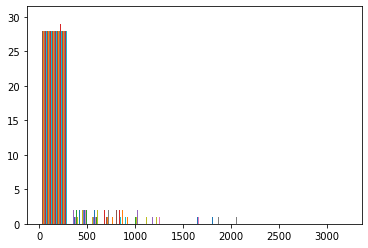

In [59]:
plt.hist(X_train)


(array([[29.,  1.,  0., ...,  0.,  0.,  0.],
        [29.,  1.,  0., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        ...,
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  1., ...,  0.,  0.,  0.]]),
 array([   0. ,  425.4,  850.8, 1276.2, 1701.6, 2127. , 2552.4, 2977.8,
        3403.2, 3828.6, 4254. ]),
 <a list of 171 Lists of Patches objects>)

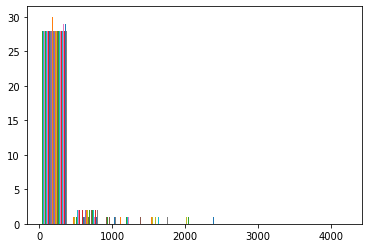

In [60]:
plt.hist(X_test)


(array([250.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 148.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

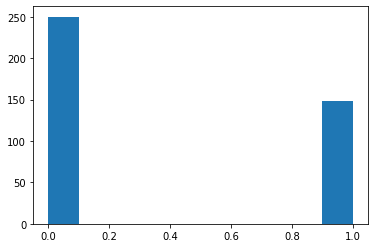

In [61]:
plt.hist(y_train)


(array([107.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  64.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

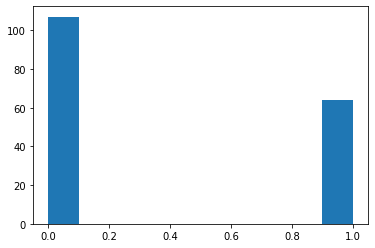

In [62]:
plt.hist(y_test)


## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets.

### Training Set Correlation values

In [63]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.316963,0.997795,0.988057,0.183293,0.512571,0.669037,0.825022,0.144501,-0.295721,0.685919,-0.087854,0.677916,0.759719,-0.185058,0.204953,0.166320,0.348723,-0.055730,-0.024398,0.971550,0.290345,0.965692,0.948267,0.146706,0.428973,0.529754,0.744468,0.176127,0.025592
Mean_Texture,0.316963,1.000000,0.323719,0.313750,-0.033652,0.241159,0.295402,0.286134,0.060440,-0.062200,0.264711,0.398104,0.278666,0.244805,0.032783,0.212768,0.144984,0.181190,0.057330,0.080688,0.338245,0.916798,0.349421,0.327781,0.059222,0.286005,0.313496,0.292189,0.109740,0.136687
Mean_Perimeter,0.997795,0.323719,1.000000,0.986365,0.219377,0.564091,0.708472,0.853606,0.181894,-0.243900,0.699849,-0.075781,0.698658,0.768897,-0.166425,0.250253,0.199515,0.381252,-0.028523,0.012585,0.971371,0.296418,0.971120,0.947802,0.175321,0.470979,0.565392,0.771092,0.202065,0.070098
Mean_Area,0.988057,0.313750,0.986365,1.000000,0.186791,0.498284,0.673326,0.823234,0.139995,-0.273668,0.732831,-0.056323,0.722291,0.813049,-0.130518,0.206078,0.176892,0.339113,-0.023156,-0.007795,0.963406,0.280649,0.956959,0.962131,0.146312,0.400198,0.509778,0.717926,0.150681,0.013617
Mean_Smoothness,0.183293,-0.033652,0.219377,0.186791,1.000000,0.646602,0.522569,0.555048,0.535739,0.567376,0.324945,0.090257,0.320094,0.274555,0.318630,0.316957,0.241540,0.382394,0.230787,0.267993,0.217699,0.015433,0.244952,0.208715,0.789990,0.458503,0.417252,0.490842,0.359028,0.484400
Mean_Compactness,0.512571,0.241159,0.564091,0.498284,0.646602,1.000000,0.882234,0.830937,0.623457,0.569340,0.520965,0.057222,0.574710,0.484541,0.121937,0.739787,0.549125,0.643992,0.304328,0.500920,0.541130,0.238117,0.599473,0.512123,0.546995,0.865639,0.805637,0.810977,0.528127,0.689708
Mean_Concavity,0.669037,0.295402,0.708472,0.673326,0.522569,0.882234,1.000000,0.917766,0.520203,0.362323,0.644144,0.094488,0.667072,0.634486,0.116102,0.673617,0.683895,0.687311,0.245904,0.467446,0.681141,0.284547,0.723264,0.667527,0.444589,0.755692,0.879617,0.854852,0.417539,0.530471
Mean_Concave_Points,0.825022,0.286134,0.853606,0.823234,0.555048,0.830937,0.917766,1.000000,0.471802,0.175497,0.713914,0.042053,0.724576,0.721842,0.036588,0.491678,0.416362,0.601595,0.154533,0.265696,0.831835,0.279611,0.858544,0.814136,0.450692,0.672372,0.748881,0.902734,0.376733,0.376839
Mean_Symmetry,0.144501,0.060440,0.181894,0.139995,0.535739,0.623457,0.520203,0.471802,1.000000,0.489807,0.305285,0.141727,0.321545,0.228477,0.173436,0.445884,0.358668,0.414173,0.471234,0.329018,0.183107,0.073040,0.223181,0.167015,0.416907,0.501209,0.453068,0.442174,0.692672,0.459078
Mean_Fractal_Dimension,-0.295721,-0.062200,-0.243900,-0.273668,0.567376,0.569340,0.362323,0.175497,0.489807,1.000000,0.033133,0.166858,0.078793,-0.067773,0.340578,0.577961,0.471790,0.380248,0.381757,0.677750,-0.238602,-0.052638,-0.184212,-0.225640,0.469102,0.461687,0.353435,0.184003,0.337722,0.768935


### Test set correlation values

In [64]:
X_test.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.340391,0.998007,0.985704,0.141507,0.491025,0.698638,0.818055,0.154901,-0.348087,0.664481,-0.124136,0.667646,0.690156,-0.317874,0.213743,0.310940,0.454827,-0.236358,-0.101261,0.964935,0.312775,0.963886,0.925817,0.061754,0.376282,0.520963,0.745522,0.132102,-0.031477
Mean_Texture,0.340391,1.000000,0.344358,0.339023,0.009011,0.233247,0.329868,0.316746,0.089991,-0.101521,0.310739,0.369366,0.300562,0.294801,-0.050956,0.146344,0.167759,0.138420,-0.105791,-0.012519,0.385451,0.900943,0.379946,0.377759,0.117314,0.260490,0.280043,0.310048,0.090295,0.085336
Mean_Perimeter,0.998007,0.344358,1.000000,0.986866,0.179500,0.539969,0.737679,0.846023,0.185428,-0.301793,0.673888,-0.117857,0.681902,0.699073,-0.294808,0.257485,0.349159,0.481743,-0.225997,-0.062789,0.965152,0.319151,0.968677,0.928422,0.097782,0.419366,0.561041,0.773313,0.155470,0.011718
Mean_Area,0.985704,0.339023,0.986866,1.000000,0.155000,0.500310,0.719940,0.824495,0.177631,-0.304613,0.733727,-0.094180,0.740372,0.777438,-0.258155,0.236829,0.334921,0.465345,-0.205584,-0.058117,0.961261,0.303740,0.964280,0.953486,0.075234,0.367103,0.520324,0.732993,0.125204,-0.016686
Mean_Smoothness,0.141507,0.009011,0.179500,0.155000,1.000000,0.691295,0.518718,0.549718,0.617267,0.623882,0.241490,0.005267,0.232116,0.187376,0.365909,0.328541,0.281515,0.371836,0.116001,0.337987,0.204126,0.091567,0.225286,0.204352,0.843063,0.508352,0.476893,0.530291,0.491900,0.536400
Mean_Compactness,0.491025,0.233247,0.539969,0.500310,0.691295,1.000000,0.885519,0.832972,0.554628,0.557332,0.437230,0.012870,0.480040,0.395891,0.169828,0.743132,0.680246,0.638601,0.016333,0.538128,0.522665,0.278442,0.568073,0.506561,0.612491,0.868306,0.843781,0.828765,0.463451,0.692542
Mean_Concavity,0.698638,0.329868,0.737679,0.719940,0.518718,0.885519,1.000000,0.931577,0.457587,0.275063,0.600229,0.021532,0.641614,0.585635,0.050174,0.667330,0.754008,0.671741,-0.016842,0.396611,0.708655,0.345699,0.747328,0.700470,0.461576,0.755834,0.895695,0.878492,0.391145,0.489126
Mean_Concave_Points,0.818055,0.316746,0.846023,0.824495,0.549718,0.832972,0.931577,1.000000,0.443969,0.146197,0.660109,-0.035815,0.676945,0.627331,0.004093,0.496687,0.549617,0.655343,-0.063436,0.239257,0.828049,0.327950,0.850640,0.801238,0.457979,0.656978,0.760748,0.926976,0.376630,0.354706
Mean_Symmetry,0.154901,0.089991,0.185428,0.177631,0.617267,0.554628,0.457587,0.443969,1.000000,0.462022,0.302834,0.093738,0.300095,0.217252,0.224912,0.362081,0.319059,0.349832,0.397919,0.356578,0.191343,0.124676,0.209804,0.199555,0.450489,0.407345,0.390279,0.406680,0.719658,0.399092
Mean_Fractal_Dimension,-0.348087,-0.101521,-0.301793,-0.304613,0.623882,0.557332,0.275063,0.146197,0.462022,1.000000,-0.078488,0.158072,-0.056055,-0.136700,0.550106,0.522879,0.393979,0.242139,0.251950,0.747323,-0.287217,-0.043254,-0.252883,-0.244769,0.578707,0.453804,0.328892,0.154320,0.329652,0.767878


## Heatmap of correlation in our dataset
As you can see from the legend the lighter the square the more highly correlated the feature data and the darker the square the less correlated or negative correlation as they become darker still. 

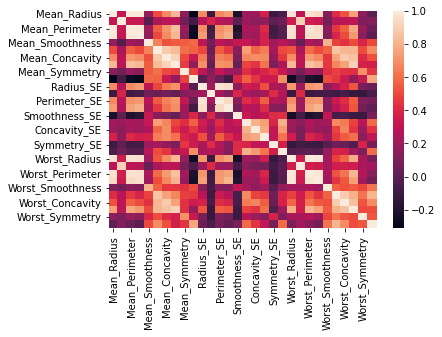

In [65]:
# it computes the Pearson’s correlation coefficient.
corr_matrix = X.corr()
#The parameter ‘ annot=True ‘ displays the values of the correlation coefficient
#in each cell
sns.heatmap(corr_matrix, annot = False)
plt.show()


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

### Reference
SKLearn documentation on Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Creating linear regression model for Mean_Radius and Mean_Fractal_Dimension
Here I have trained a model to show us the negative correlation between two features in our dataset, we can clearly see from this model that the Mean_Radius has a negative impact on the Mean_Fractal_Dimension.  When the Mean_Fractal_Dimension value increases then on average the Mean_Radius value decreases and vice versa.

y test r^2 value:  1.0
mean_squared_error value:  0.00012661131773687484
Coefficient:  [[-0.00058238]]
Intercept:  [0.07114646]
predict  [[-0.01819135]]


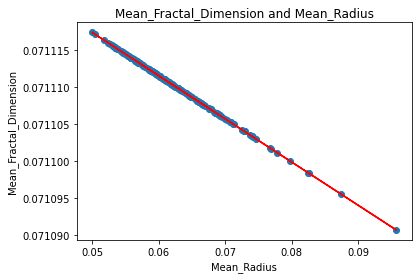

In [66]:
# Here we train a model to perform linear regression data set to predict the diagnosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats
# create the linear regression model by fitting training set to the test set
fractalDimensionArrayTest = np.array(X_test['Mean_Fractal_Dimension']).reshape(-1,1)
fractalDimensionArrayTrain = np.array(X_train['Mean_Fractal_Dimension']).reshape(-1,1)
meanRadiusArrayTrain = np.array(X_train['Mean_Radius']).reshape(-1,1)
regression_model = LinearRegression().fit(meanRadiusArrayTrain, fractalDimensionArrayTrain)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(fractalDimensionArrayTest)
rSquared = regression_model.score(fractalDimensionArrayTest, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(fractalDimensionArrayTest, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Mean_Radius")
plt.ylabel("Mean_Fractal_Dimension")
plt.title('Mean_Fractal_Dimension and Mean_Radius')
plt.scatter(fractalDimensionArrayTest,y_pred)
plt.plot(fractalDimensionArrayTest,y_pred,c='r')
print('predict ',regression_model.predict([[153.4]]))


I will demonstrate with some predictions below that the values are negatively skewed.  We will see that whenever we pass in a high fractal dimension the value will be lower and vice versa.  We can also see there is a low mean square error and a negative coefficient.  Since our coefficient is negative we will see that negative values will produce higher values for our dependent variable where as higher values will produce low values for our dependent variable

In [67]:
# As we can see not too much of a difference between the values here
print('this value will be low: ', regression_model.predict([[0.5]]))
print('this value will be high: ', regression_model.predict([[0.1]]))

# just to make our example clearer let's use ridiculously inflated values  
print('let\'s make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another')
print('this value will be low: ', regression_model.predict([[100]]))
# I use a negative value here to demonstrate the radius the higher the mean fractal dimension
print('this value will be high: ', regression_model.predict([[-100]]))


this value will be low:  [[0.07085526]]
this value will be high:  [[0.07108822]]
let's make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another
this value will be low:  [[0.01290799]]
this value will be high:  [[0.12938492]]


As we can see above that whenever I make the value of the mean fractal dimension higher then the value of our dependent variable will decrease, whenever I make it lower it will increase.  We can also see that the values don't have too much of an effect on each other this is because the low value of the negative correlation

# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  2.914691408701801e-05
Coefficient:  [[0.14971806]]
Intercept:  [0.00710708]


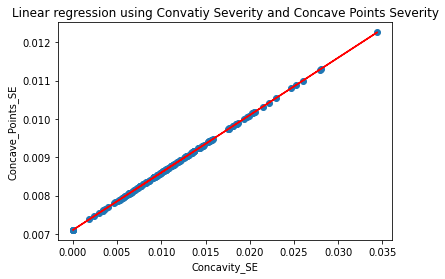

In [68]:
# create the linear regression model by fitting training set to the test set
concavePointsSeverityArrayTest = np.array(X_test['Concave_Points_SE']).reshape(-1,1)
concavePointsSeverityArrayTrain = np.array(X_train['Concave_Points_SE']).reshape(-1,1)
concaveSeverityTrain = np.array(X_train['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(concaveSeverityTrain, concavePointsSeverityArrayTrain)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(concavePointsSeverityArrayTest)
rSquared = regression_model.score(concavePointsSeverityArrayTest, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(concavePointsSeverityArrayTest, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(concavePointsSeverityArrayTest,y_pred)
plt.plot(concavePointsSeverityArrayTest,y_pred,c='r')

We can see here there is a positive coefficient which is the amount we expect the value to increase by when making a prediction, we can also see that there is a low mean squared error value this indicates the performance of the model and the distance away the points are from our line

Below we see the second models features have on one another, we can clearly see that the data has a positive correlation from our graph but let's show some concrete examples and perform some predictions using it.

In [69]:
print('this value will be high: ', regression_model.predict([[0.5]]))
print('this value will be low: ', regression_model.predict([[0.1]]))

# just to show how high the impact will be with grossly inflated / deflated values values

print('let\'s make our model predict some grossly inflated / deflated values to show severity of impact')
print('this value will be high: ', regression_model.predict([[100]]))
print('this value will be low: ', regression_model.predict([[0.0000000001]]))


this value will be high:  [[0.08196612]]
this value will be low:  [[0.02207889]]
let's make our model predict some grossly inflated / deflated values to show severity of impact
this value will be high:  [[14.97891355]]
this value will be low:  [[0.00710708]]


Since the above values are highly correlated we see a greater rise and decrease in the predicted values when predicting than we did in the first linear regression model.  This is due to the fact that these two variables have a positive correlation of 0.776207, the features we used in our first model have a lower negative correlation which is why we don't see as much of an impact on them.  If they had a negative correlation of 0.776207 we would see the same rise and decrease in the first linear regression models predicted valules as well

# Examples of low and high correlation in our dataset

Additionally we can see here the Mean Perimeter has a positive correlation with our Mean Radius feature.  Below this image we can see an example of low negative correlation, these variables don't really impact each other much

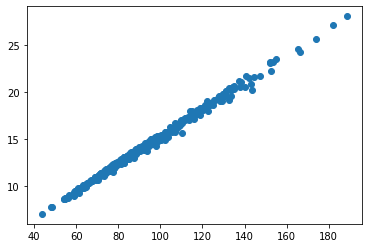

In [70]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(X_train['Mean_Perimeter'],X_train['Mean_Radius'])


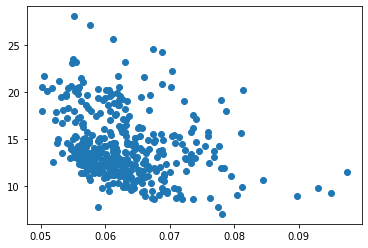

In [71]:
# example of low negative correlation
plt.scatter(X_train['Mean_Fractal_Dimension'],X_train['Mean_Radius'])


In [160]:
def predictValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)
  print('Total Percentage Correct: ', (correct / count) * 100, ' %')


In [161]:
def predictKnnValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)

In [162]:
y_test.head()

474    0
440    0
545    0
408    1
487    1
Name: Diagnosis, dtype: int64

# K Means

Here we use kmeans to predict the diagnosis values in our test set from our training set as you can see it performs adequately predicting 146 out of 171 values correctly which is approximately 85% of our dataset

In [163]:
from sklearn.cluster import KMeans
y_testArray = np.array(y_test).reshape(-1,1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
kmeans.labels_
predictValues(y_testArray,kmeans.predict(X_test))

Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predic

# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.96 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data. This algorithm works by clustering data with similar features and classifying them.

### references

SKLearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [164]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=55)
knn.fit(X_train,y_train)
print('Performance of model: ',knn.score(X,y))


Performance of model:  0.9138840070298769


In [165]:
# Make prediction on testSet
predictValues(y,knn.predict(X))

Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on features from the dataset, I chose to input a large number of features into this model as generally this algorithm performs better when fitted with more features, in Naive Bayes the weights of the features have no bearing on the output.  The model below appears to be overfitted

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

You may also notice we are using a particular kind of Naive Bayes called Gaussian Naive Bayes for this model.  We chose to include this version of Naive Bayes due to it's ability to handle continuous data. The algorithm also has the advantage of speed and is frequently used in email spam classifiers.  The algorithm works by assuming that the continuous values across the features are normally distributed in a Gaussian fashion(think of a bell curve!)

## What happens when we don't scale the data

Demonstrating the zero frequency phenomenon, we can see below that when we train the model using our train sets we experience a phenomenon known as zero frequency.  This occurs when the model takes all probabilities of our features and performs calculations which result in a total score of zero or when one value has a much higher probability with another.  Here we induced zero frequency which occurred due to our relatively small dataset.

### Notice in our first model the malignant value is appearing for all  predictions, and in our second model 0 is being predicted for all the test set values.  Also notice our probability where one value is much higher than the other.

In [166]:

from sklearn.naive_bayes import GaussianNB
yTestArray = np.array(y_test).reshape(-1,1)
y_trainArray = np.array(y_train).reshape(-1,1)
probability = np.array(y_test.iloc[0:2]).reshape(-1,1)

# here we smooth the data to improve accuracy
naive_bayes = GaussianNB(priors=None)
y_train_pred = naive_bayes.fit(X_train,y_train).predict(y_trainArray)
print('Score of model on training set: ', naive_bayes.score(X_train,y_train))
y_pred = naive_bayes.fit(X_train,y_train).predict(yTestArray)
print('Score of model on test sets: ', naive_bayes.score(X_test,y_test))
print('Probability of diagnosis values occurring: ',naive_bayes.predict_proba(probability))


Score of model on training set:  0.9371859296482412
Score of model on test sets:  0.9590643274853801
Probability of diagnosis values occurring:  [[9.96845878e-06 9.99990032e-01]
 [9.96845878e-06 9.99990032e-01]]


In [167]:
predictValues(yTestArray,y_pred)
predictValues(y_trainArray,y_train_pred)


Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  1
Actual:  [1]  Predic

In [168]:
naive_bayes = GaussianNB(priors=None,var_smoothing=1)


y_train_pred = naive_bayes.fit(X_train,y_train).predict(y_trainArray)
y_pred = naive_bayes.fit(X_train,y_train).predict(yTestArray)
print('Score of model: ', naive_bayes.score(X_test,y_test))
print('Probability of diagnosis values occurring: ',naive_bayes.predict_proba(probability))




Score of model:  0.8362573099415205
Probability of diagnosis values occurring:  [[0.94628486 0.05371514]
 [0.94628486 0.05371514]]


In [169]:
predictValues(y_trainArray,y_train_pred)
predictValues(yTestArray,y_pred) 

Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predic

# Alternative Naive Bayes Model

Below we scaled the data and evened out the probability of each of our values occurring, notice we receive far more accurate results

In [170]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler  
# scaling the features to reduce unwanted influence 
sc = StandardScaler()  
X_train_scaled = sc.fit_transform(X_train)  
X_test_scaled = sc.fit_transform(X_test) 

# reshaping y_test to fit with naive_bayes predict output for comparison
yTestReshaped = np.array(y_test).reshape(-1,1)

naive_bayes = GaussianNB(priors=None)
#training the model 
naive_bayes.fit(X_train_scaled,y_train)
#using X_test data in the trained model to predict y
y_pred=naive_bayes.predict(X_test_scaled)

print('Score of model on test sets: ', naive_bayes.score(X_test_scaled,y_test))
print('Accuracy Score of results: ',accuracy_score(y_test, y_pred)) #using as a double check on accuracy
# printing the probability
print('Probability of diagnosis values occurring: ',naive_bayes.predict_proba(X_test_scaled))
# The actual and predicted side by side and totaled comparison
print(predictValues(yTestReshaped,y_pred))

Score of model on test sets:  0.9532163742690059
Accuracy Score of results:  0.9532163742690059
Probability of diagnosis values occurring:  [[1.00000000e+000 7.19367435e-013]
 [9.99999702e-001 2.98208473e-007]
 [1.00000000e+000 9.05501677e-013]
 [2.73274272e-026 1.00000000e+000]
 [9.34064532e-057 1.00000000e+000]
 [8.11279772e-025 1.00000000e+000]
 [1.00000000e+000 1.28717475e-021]
 [9.46494259e-060 1.00000000e+000]
 [9.99990449e-001 9.55069943e-006]
 [1.00000000e+000 8.85998350e-011]
 [9.97230521e-001 2.76947928e-003]
 [2.36425536e-033 1.00000000e+000]
 [1.00000000e+000 6.74730814e-016]
 [1.93799031e-018 1.00000000e+000]
 [6.98559885e-018 1.00000000e+000]
 [7.17044787e-093 1.00000000e+000]
 [3.17210765e-033 1.00000000e+000]
 [6.90016063e-018 1.00000000e+000]
 [1.82312599e-019 1.00000000e+000]
 [4.86573979e-003 9.95134260e-001]
 [1.00000000e+000 2.45421965e-017]
 [4.43027350e-005 9.99955697e-001]
 [9.94560256e-001 5.43974352e-003]
 [1.00000000e+000 1.02604633e-014]
 [1.00000000e+000 1.

In [171]:
#Confusion Matrix for alternative Naive Bayes  

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(yTestReshaped, y_pred)  

print(cm)  

[[103   4]
 [  4  60]]


# Decision Trees

In [172]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


Training the first default tree model

In [173]:
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)



In [174]:
print(y_test.shape,y_train.shape,X_train.shape,X_test.shape)

(171,) (398,) (398, 30) (171, 30)


Here we display the tree

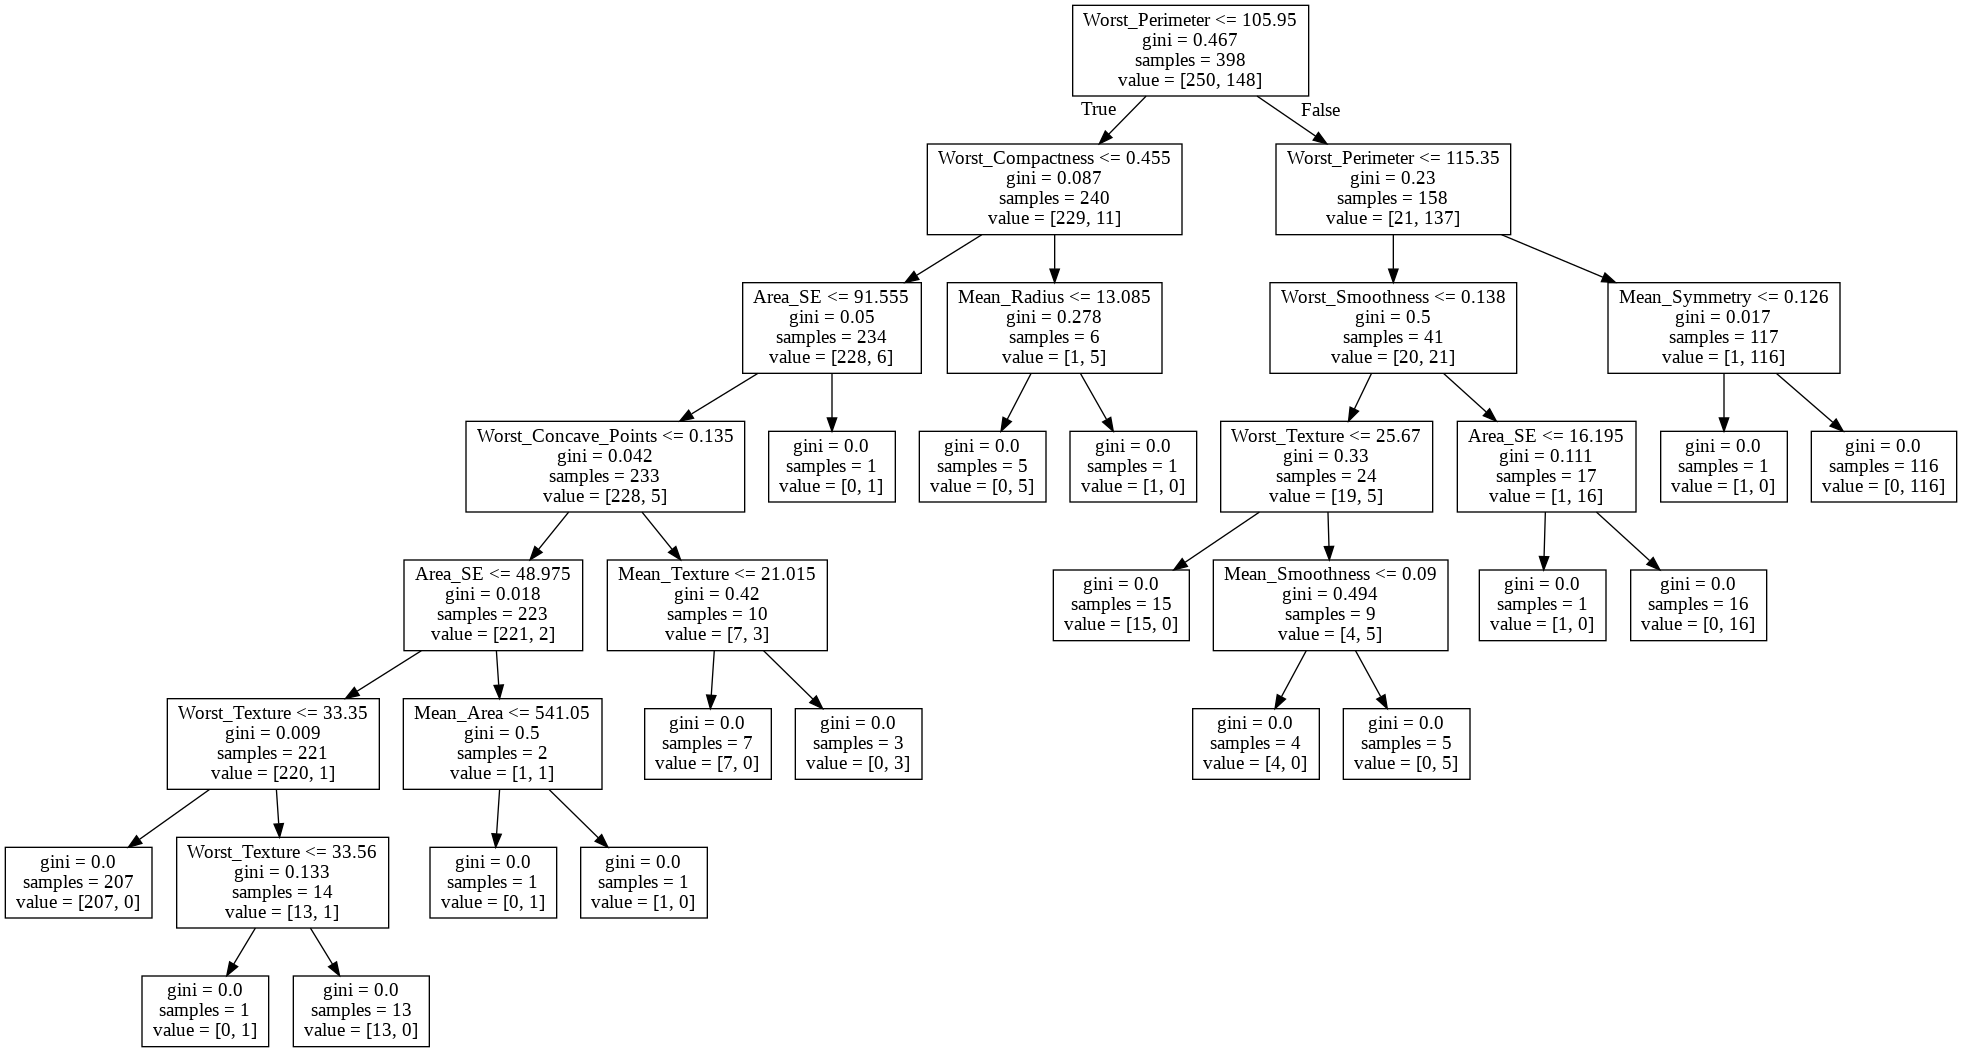

In [175]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The predicticton result for test data, this should really be fresh data not reusing training data



In [176]:
#When we use our training data above we should use our validation data here to test the predictions and have a further test set 
# however we only have train and test data so using Test set
print("Making predictions for the following test patients:")
print(X_test)
print("The predictions are")
print(clf.predict(X_test))

Making predictions for the following test patients:
     Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
474        10.88         15.62  ...          0.2581                  0.10800
440        10.97         17.20  ...          0.2540                  0.09532
545        13.62         23.23  ...          0.2642                  0.06953
408        17.99         20.66  ...          0.3060                  0.08503
487        19.44         18.82  ...          0.3266                  0.09009
..           ...           ...  ...             ...                      ...
406        16.14         14.86  ...          0.2778                  0.07012
374        13.69         16.07  ...          0.3323                  0.07701
200        12.23         19.56  ...          0.2668                  0.08174
403        12.94         16.17  ...          0.3297                  0.07834
254        19.45         19.33  ...          0.3379                  0.08950

[171 rows x 30 columns]

Desicion tree test results



In [177]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1]
Accuracy: 0.9298245614035088


Random forest

In [178]:

from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=10)
rfclf = rfclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfclf.predict(X_test)
print(y_pred)

#Test Random forest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1]
Accuracy: 0.9532163742690059


So we can see that the Random forest is more accurate

We also explored the alternative to the decision tree using entropy criterion rather than the default gini



In [179]:

entclf = tree.DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
entclf = entclf.fit(X_train,y_train)

Display the entropy tree



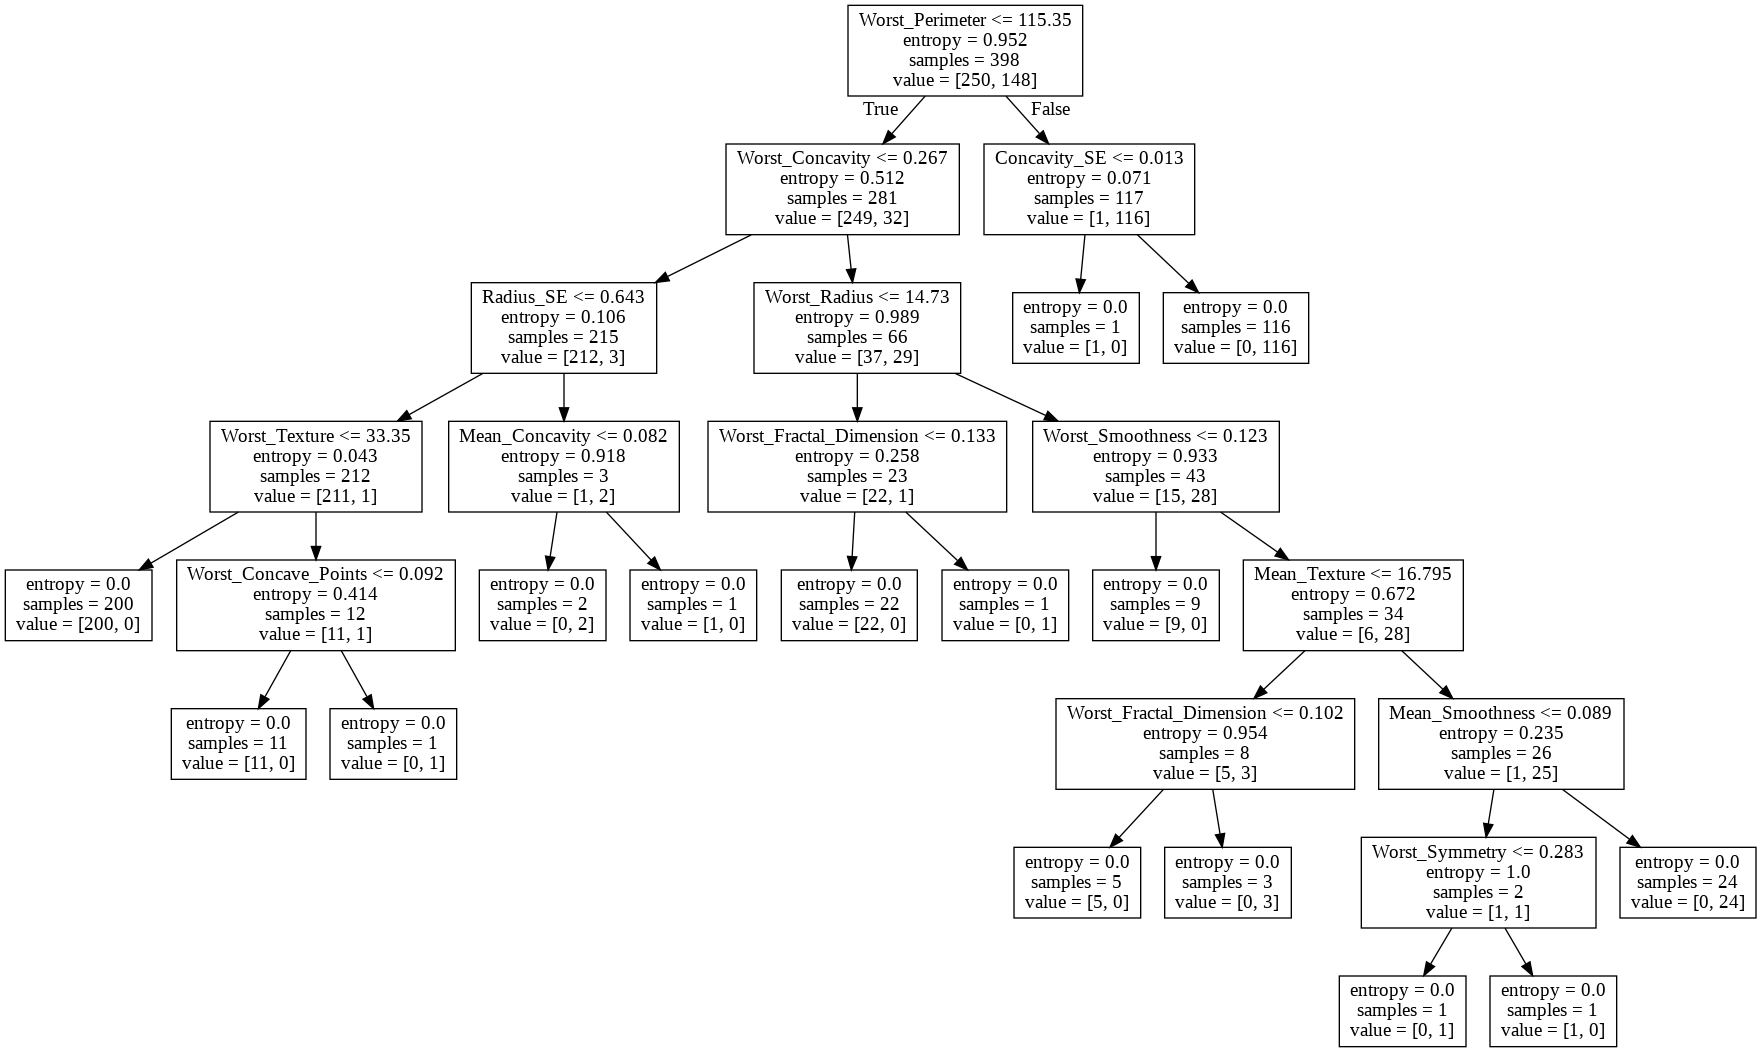

In [180]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(entclf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

entropy tree results

In [181]:

#Predict the response for test dataset
y_pred = entclf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1]
Accuracy: 0.9064327485380117


Random Entropy forest

In [182]:

rfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)
rfentclf = rfentclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfentclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1]
Accuracy: 0.9649122807017544


 the tree and forest models explored via Cross-validation



In [183]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
np.random.seed(1)
print('X_test set shape: ',X.shape)
print('y_test set shape: ',y.shape)
# trees and forests used above but without the train/test split these will be applied using the cross validation to see the accuracy of the models 
cvclf = tree.DecisionTreeClassifier()
cvrfclf = RandomForestClassifier(n_estimators=10)
cventclf = tree.DecisionTreeClassifier(criterion="entropy")
cvrfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)

scores = cross_val_score(cvclf, X, y)
print('gini tree accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
cvResults=cross_validate(cvclf, X, y)
print('Test scores for gini tree:',cvResults['test_score'])

scores = cross_val_score(cvrfclf, X, y)
print('gini random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
cvResults=cross_validate(cvrfclf, X, y)
print('Test scores for gini random forest:',cvResults['test_score'])

scores = cross_val_score(cventclf, X, y)
print('entropy accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
cvResults=cross_validate(cventclf, X, y)
print('Test scores for entropy tree:',cvResults['test_score'])

scores = cross_val_score(cvrfentclf, X, y)
print('entropy random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
cvResults=cross_validate(cvrfentclf, X, y)
print('Test scores for entropy forest:',cvResults['test_score'])


X_test set shape:  (569, 30)
y_test set shape:  (569,)
gini tree accuracy = 0.9121099208197485 +/- 0.011235106844788624
Test scores for gini tree: [0.9122807  0.9122807  0.92105263 0.92105263 0.90265487]
gini random forest accuracy = 0.9613724576929048 +/- 0.013078882567012277
Test scores for gini random forest: [0.97368421 0.92105263 0.97368421 0.95614035 0.97345133]
entropy accuracy = 0.924437199192672 +/- 0.015253603562759774
Test scores for entropy tree: [0.92982456 0.90350877 0.94736842 0.95614035 0.94690265]
entropy random forest accuracy = 0.9507995652848937 +/- 0.01967278843804794
Test scores for entropy forest: [0.93859649 0.93859649 0.97368421 0.95614035 0.96460177]


Principal Component Analysis(PCA) exploring the difference of using reduced dimensions.  

In [184]:
# Standardise the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = wdbcwh[features]
x = StandardScaler().fit_transform(x)
#Explain the results
print(np.mean(x))
print(np.std(x))
#PCA we found that 7 components retained over 90% of the data
pca = PCA(n_components=7, whiten=True).fit(x)
X_pca = pca.transform(x)
print(pca.components_)
print("Information retained by each component:",pca.explained_variance_ratio_)
print("Retained information total:",sum(pca.explained_variance_ratio_))

1.2487570048507913e-18
1.0
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e

Applying the PCA to the gini decision tree and random forest

In [185]:
X_pcatrain, X_pcatest, y_pcatrain, y_pcatest = train_test_split(X_pca, y, test_size=0.3)

pcaclf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
pcaclf = pcaclf.fit(X_pcatrain,y_pcatrain)

#Predict the response for test dataset
y_pcapred = pcaclf.predict(X_pcatest)
print(y_pcapred)
# Test decision tree accuracy
print("PCA Gini Tree Accuracy:",metrics.accuracy_score(y_pcatest, y_pcapred))

pcarfclf = RandomForestClassifier(n_estimators=10)
pcarfclf = pcarfclf.fit(X_pcatrain,y_pcatrain)
#Predict result from the data given
y_pcarfpred=pcarfclf.predict(X_pcatest)
print(y_pcarfpred)

#Test Random forest accuracy
print("PCA Gini Random Forest Accuracy:",metrics.accuracy_score(y_pcatest, y_pcarfpred))

[0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
PCA Gini Tree Accuracy: 0.9415204678362573
[0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
PCA Gini Random Forest Accuracy: 0.9766081871345029


As we can see the results are still highly accurate and if the data set was larger this reduction in features/columns would become more obvious for speed. However that would have to be offset against the possibility of misdiagnosis